# Problem Statement :
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Objective :
Need to perform clustering to summarize customer segments.

# Feature Description :
**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year 
- Education: Customer's education
- level Marital_Status: Customer's marital status 
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's
- household Dt_Customer: Date of customer's enrollment with the company 
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

 **Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years 
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue 
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
# Importing Libraies
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import sys
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
# for ignoring warning
# Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, 
# where that condition (normally) doesn’t warrant raising an exception and terminating the program. 
# For example, one might want to issue a warning when a program uses an obsolete module.

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Loading dataset

In [3]:
data = pd.read_excel(r'C:\Users\vacha\Downloads\marketing_campaign1 (1).xlsx' )

In [4]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# Basic infromation about data

In [5]:
print('Number of datapoints in the dataset: ', len(data))
print('Number of rows {} and columns {}:' .format(data.shape[0],data.shape[1]))
print('Column names:', data.columns)

Number of datapoints in the dataset:  2240
Number of rows 2240 and columns 29:
Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


# Data Cleaning
In this section

- Data Cleaning
- Feature Engineering
In order to, get a full grasp of what steps should I be taking to clean the dataset.

In [6]:
# getting information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Conclusion:
- There are 14 missing values in Income feature.

- Dt_Customer indicates the date on that date customer joined the database is not parsed as DateTime.

- There are some categorical features in our data frame(feature's data type like-> dtype: object).

So we will need to encode them into numeric forms later.

In [7]:
# Removing missing values
data = data.dropna()
print("Number of data-points after removing the rows with missing values:", len(data))


Number of data-points after removing the rows with missing values: 2216


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

Creating a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record

# Feature Engineering

In [9]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))
  

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [10]:
data['Age'] = 2015 - data['Year_Birth']

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [11]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
    

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [12]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
     

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [13]:
data['Children'] = data['Kidhome'] + data['Teenhome']

To get further clarity of household, Creating feature indicating "Family_Size"

In [14]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']
 

Create a feature "Is_Parent" to indicate parenthood status

In [15]:
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

Segmenting education levels in three groups

In [16]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

Dropping some of the redundant features

In [17]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [18]:
data.head(3)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduate  58138.0        0         0       58       635         88   
1  Graduate  46344.0        1         1       38        11          1   
2  Graduate  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   

   AcceptedCmp2  Complain  Response  Age  Spent  Living_With  Children  \
0             0         0         1   58   1617        Alone         0   
1             0         0         0   61     27        Alone         2   
2             0         0         0   50    776      Partner         0   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  

[3 rows x 29 columns]

# Data Analysis and Visualization

In [19]:
data.shape

(2216, 29)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [21]:
data.describe().T

count          mean           std     min      25%  \
Income               2216.0  52247.251354  25173.076661  1730.0  35303.0   
Kidhome              2216.0      0.441787      0.536896     0.0      0.0   
Teenhome             2216.0      0.505415      0.544181     0.0      0.0   
Recency              2216.0     49.012635     28.948352     0.0     24.0   
MntWines             2216.0    305.091606    337.327920     0.0     24.0   
MntFruits            2216.0     26.356047     39.793917     0.0      2.0   
MntMeatProducts      2216.0    166.995939    224.283273     0.0     16.0   
MntFishProducts      2216.0     37.637635     54.752082     0.0      3.0   
MntSweetProducts     2216.0     27.028881     41.072046     0.0      1.0   
MntGoldProds         2216.0     43.965253     51.815414     0.0      9.0   
NumDealsPurchases    2216.0      2.323556      1.923716     0.0      1.0   
NumWebPurchases      2216.0      4.085289      2.740951     0.0      2.0   
NumCatalogPurchases  2216.0      2.671029      2.926734     0.0      0.0   
NumStorePurchases    2216.0      5.800993      3.250785     0.0      3.0   
NumWebVisitsMonth    2216.0      5.319043      2.425359     0.0      3.0   
AcceptedCmp3         2216.0      0.073556      0.261106     0.0      0.0   
AcceptedCmp4         2216.0      0.074007      0.261842     0.0      0.0   
AcceptedCmp5         2216.0      0.073105      0.260367     0.0      0.0   
AcceptedCmp1         2216.0      0.064079      0.244950     0.0      0.0   
AcceptedCmp2         2216.0      0.013538      0.115588     0.0      0.0   
Complain             2216.0      0.009477      0.096907     0.0      0.0   
Response             2216.0      0.150271      0.357417     0.0      0.0   
Age                  2216.0     46.179603     11.985554    19.0     38.0   
Spent                2216.0    607.075361    602.900476     5.0     69.0   
Children             2216.0      0.947202      0.749062     0.0      0.0   
Family_Size          2216.0      2.592509      0.905722     1.0      2.0   
Is_Parent            2216.0      0.714350      0.451825     0.0      0.0   

                         50%       75%       max  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               174.5    505.00    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         68.0    232.25    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     262.0  
MntGoldProds            24.5     56.00     321.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Age                     45.0     56.00     122.0  
Spent                  396.5   1048.00    2525.0  
Children                 1.0      1.00       3.0  
Family_Size              3.0      3.00       5.0  
Is_Parent                1.0      1.00       1.0

In [22]:
data.describe(include=object).T

count unique       top  freq
Education    2216      3  Graduate  1116
Living_With  2216      2   Partner  1430

# Conclusion:
- The above stats show some differences in mean Income and Age and max Income and age.

- Do note that max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.

- Now we must take a look at the broader view of the data by plotting some of the selected features.

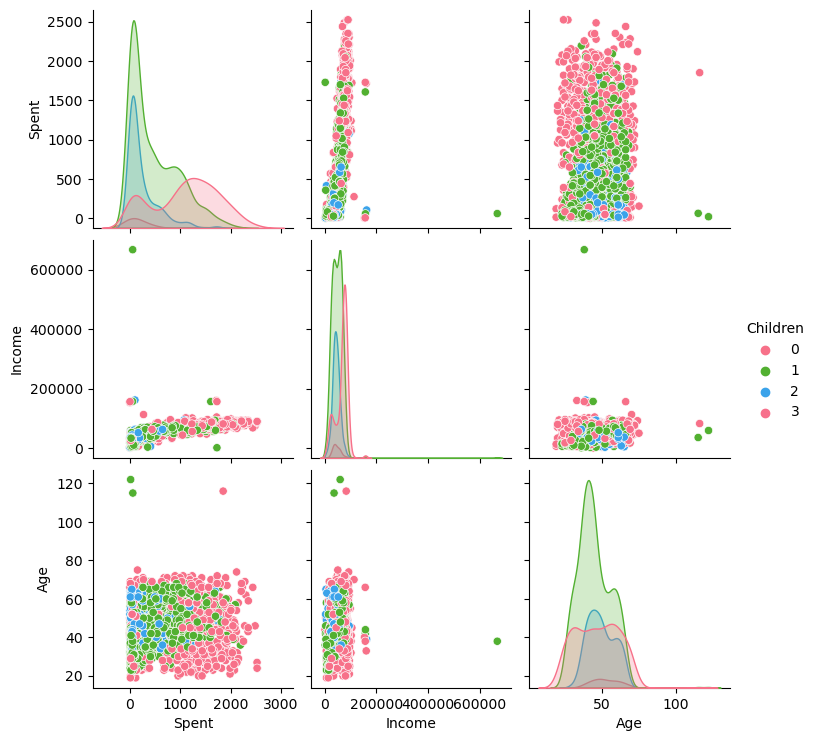

In [23]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

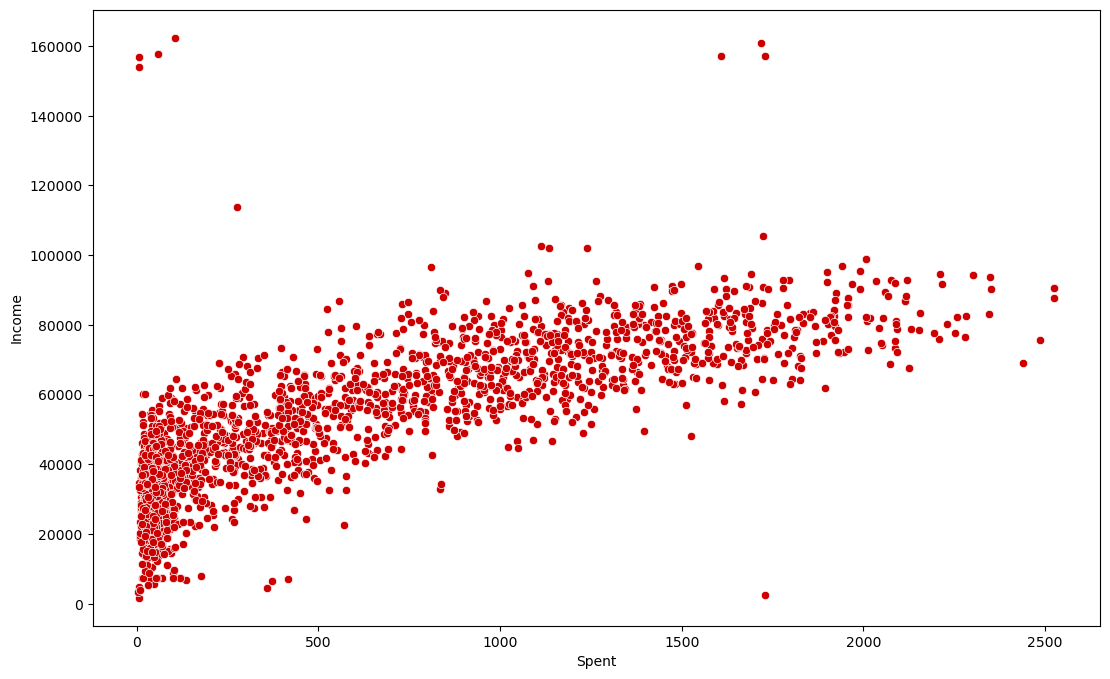

In [24]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');
plt.show()

In [25]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

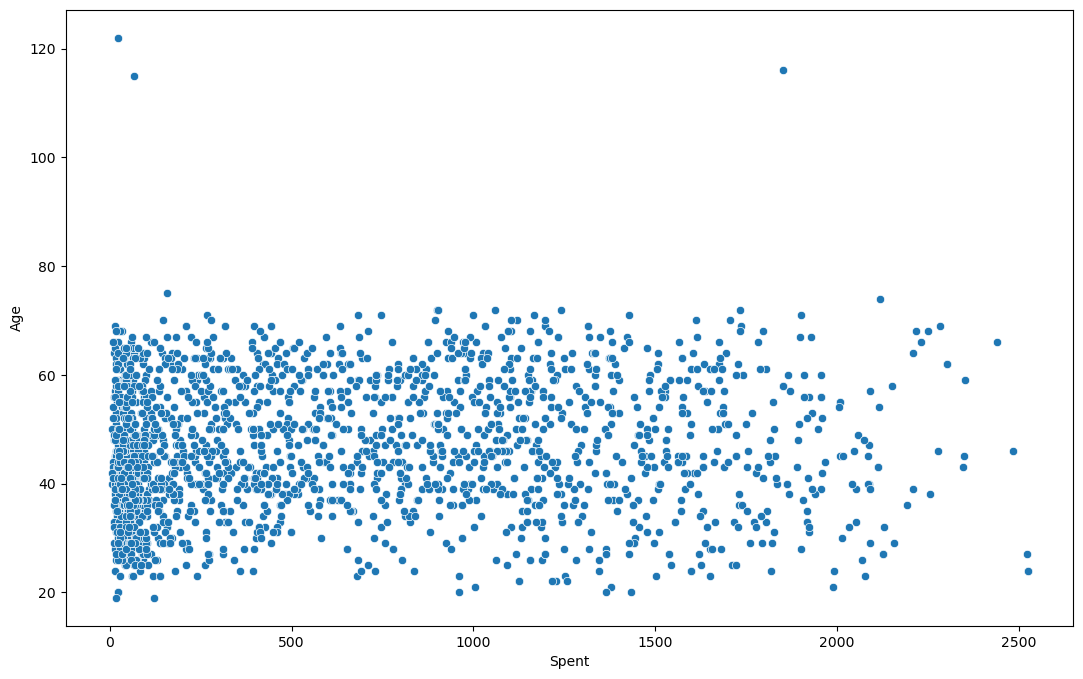

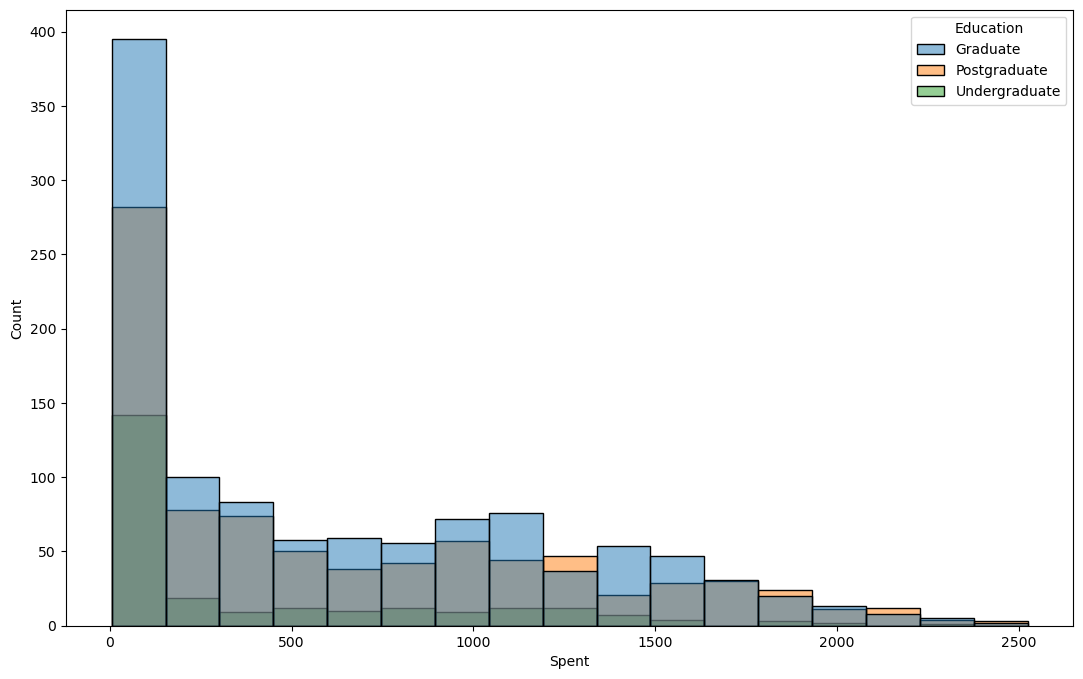

In [26]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);
plt.show()

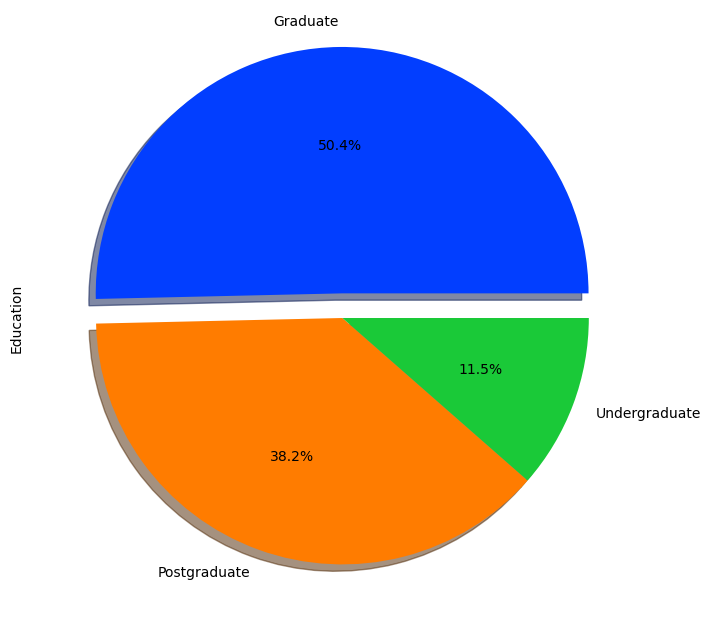

In [27]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));
plt.show()

# Description:
Clearly, there are a few outliers in the Income and Age features. so now outliers will be removed from data.

# Outlier Detection
The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.



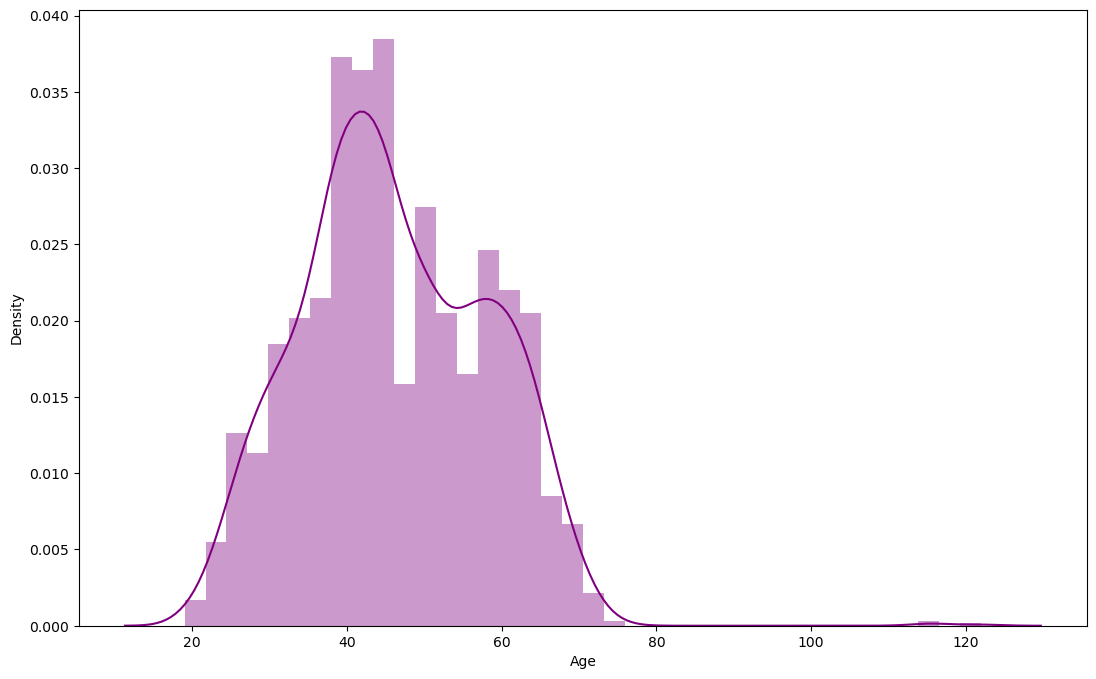

In [28]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple');
plt.show()

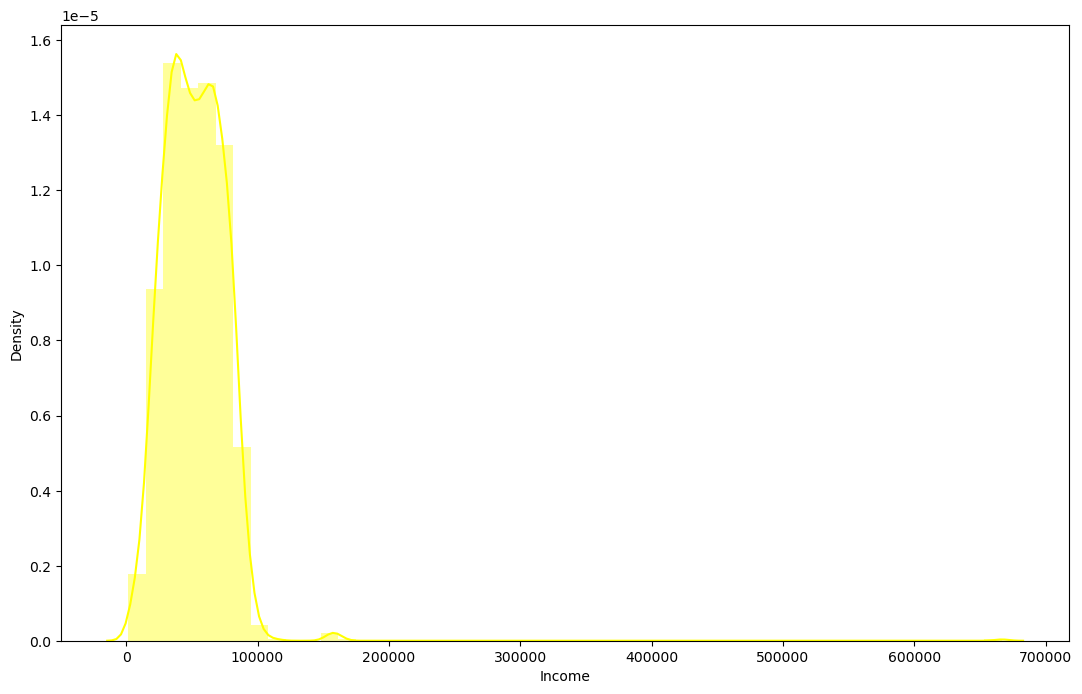

In [29]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income,color = 'Yellow');
plt.show()

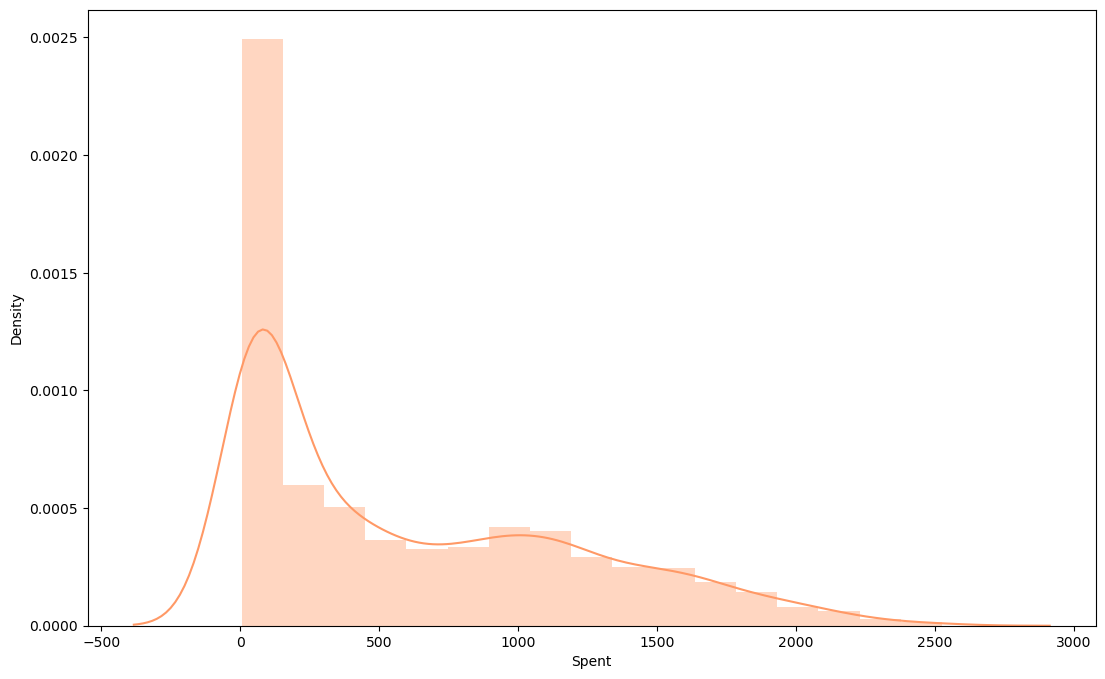

In [30]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966');
plt.show()

Another way of visualising outliers is using boxplots and whiskers, which provides the quantiles (box) and inter-quantile range (whiskers), with the outliers sitting outside the error bars (whiskers).

All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

In [31]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()

In [32]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [33]:
def detect_outliers(d):
    for i in d:
        Q3, Q1 = np.percentile(data[i], [75 ,25])
        IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')
     

In [34]:
detect_outliers(numerical)

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



We will delete some of the outlier points.

In [35]:
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [36]:
data.shape

(2212, 29)

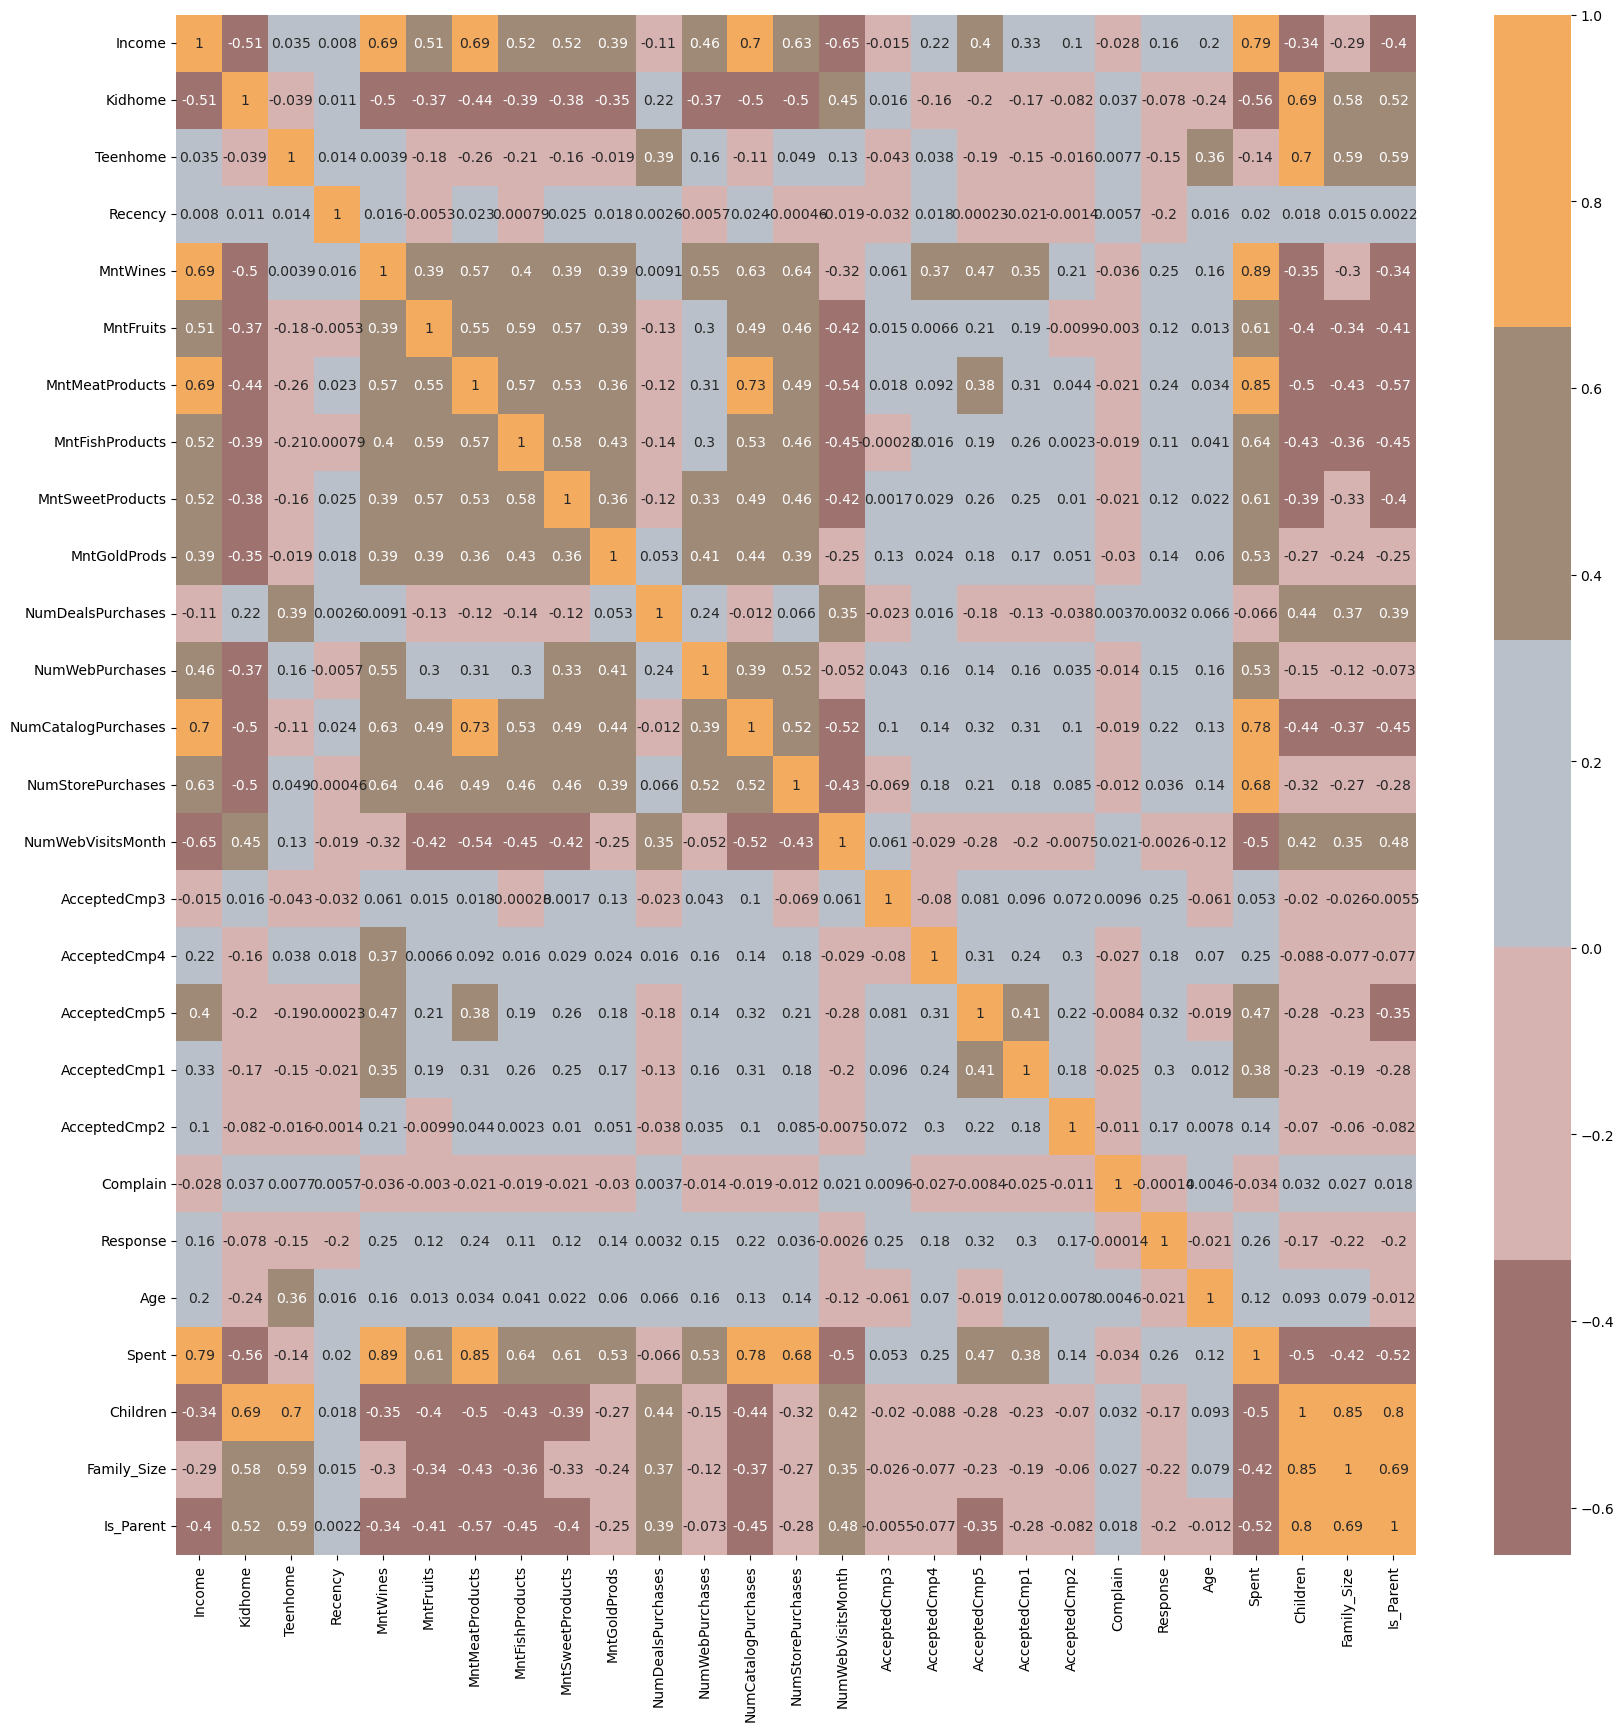

In [37]:
# Checkking correlation amongst the features. (Excluding the categorical attributes at this point)
# Correlation matrix
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.show()

# Conclusion:
- The data is quite clean and the new features have been included


# Data Preprocessing
The following steps are applied to preprocess the data:

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [38]:
# Getting list of categorical variables
## variable cv contains the names of coulmns whose data type is object
cv = (data.dtypes == 'object')
cat_var = list(cv[cv].index)

print("Categorical variables in the dataset:", cat_var)

Categorical variables in the dataset: ['Education', 'Living_With']


In [39]:
cv[cv].index

Index(['Education', 'Living_With'], dtype='object')

In [40]:
print('Before label encoding')
print(data[['Education', 'Living_With']])

# Label Encoding the object dtypes.
LE=LabelEncoder()
for i in  cat_var:
    data[i]=data[[i]].apply(LE.fit_transform)
print('********************************')
print('After label encoding')
print(data[['Education', 'Living_With']])

Before label encoding
         Education Living_With
0         Graduate       Alone
1         Graduate       Alone
2         Graduate     Partner
3         Graduate     Partner
4     Postgraduate     Partner
...            ...         ...
2235      Graduate     Partner
2236  Postgraduate     Partner
2237      Graduate       Alone
2238  Postgraduate     Partner
2239  Postgraduate     Partner

[2212 rows x 2 columns]
********************************
After label encoding
      Education  Living_With
0             0            0
1             0            0
2             0            1
3             0            1
4             1            1
...         ...          ...
2235          0            1
2236          1            1
2237          0            0
2238          1            1
2239          1            1

[2212 rows x 2 columns]


# Feature Scaling
- In this section, numerical features are scaled.

In [41]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [42]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumWebPurchases  \
0         1.690293         2.453472          1.483713  ...         1.426865   
1        -0.718230        -0.651004         -0.634019  ...        -1.126420   
2        -0.178542         1.339513         -0.147184  ...         1.426865   
3        -0.655787        -0.504911         -0.585335  ...        -0.761665   
4        -0.218684         0.152508         -0.001133  ...         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0             2.503607          -0.555814           0.692181  1.018352   
1            -0.571340          -1.171160          -0.132545  1.274785   
2            -0.229679           1.290224          -0.544908  0.334530   
3            -0.913000          -0.555814           0.279818 -1.289547   
4             0.111982           0.059532          -0.132545 -1.033114   

      Spent  Living_With  Children  Family_Size  Is_Parent  
0  1.676245    -1.349603 -1.264598    -1.758359  -1.581139  
1 -0.963297    -1.349603  1.404572     0.449070   0.632456  
2  0.280110     0.740959 -1.264598    -0.654644  -1.581139  
3 -0.920135     0.740959  0.069987     0.449070   0.632456  
4 -0.307562     0.740959  0.069987     0.449070   0.632456  

[5 rows x 22 columns]

# Dimensionality Reduction:
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

# Principal component analysis (PCA) 
is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

# Steps in this section:

- Dimensionality reduction with PCA
- Plotting the reduced dataframe

In [43]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -3.111837e-17  2.877338 -5.940876 -2.552996 -0.776146  2.394880   
col2  2212.0  4.958862e-17  1.699736 -4.285528 -1.329375 -0.149694  1.244895   
col3  2212.0  5.199779e-17  1.153616 -2.943620 -0.890900 -0.140871  0.813051   

           max  
col1  7.411440  
col2  6.110742  
col3  3.965047

In [44]:
pca.explained_variance_

array([8.27907641, 2.88910351, 1.33082815])

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.37615153, 0.50741505, 0.56787989])

In [46]:
pd.DataFrame(pca.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.376152
2               0.131264
3               0.060465

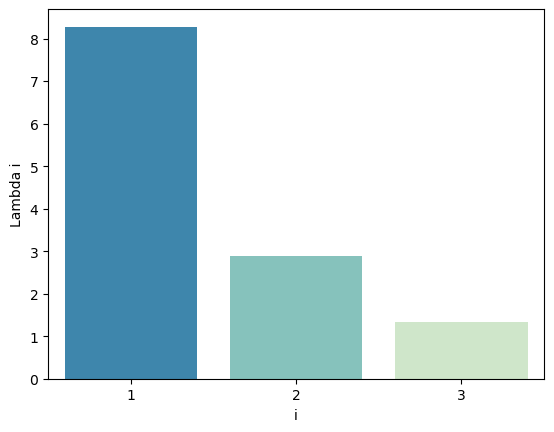

In [47]:
sns.barplot(x = list(range(1,4)), y = pca.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');
plt.show()

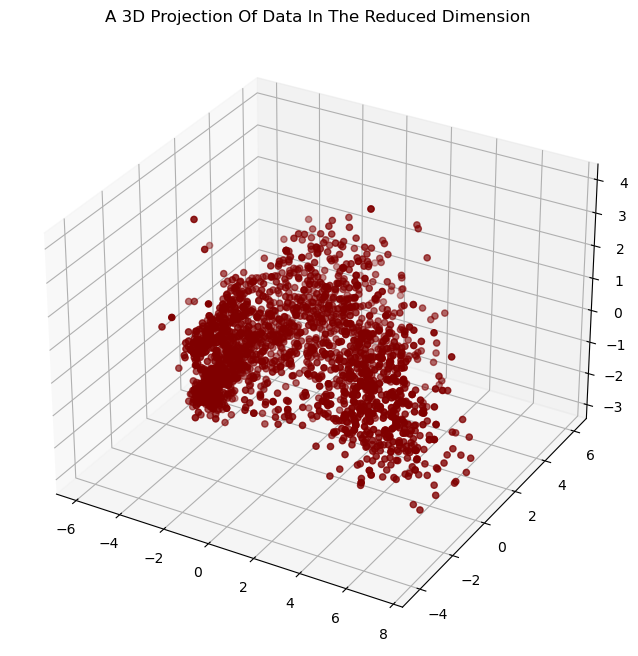

In [48]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [49]:
# Extract coordinates for the 3D plot
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=5, color="#ffc300", opacity=0.8))])
fig.update_layout(
    title=dict(text="Dataset After Dimensionality Reduction [3D Projection]",
               y=0.97, x=0.5, xanchor="center", yanchor="top", font_color="black"),
    scene=dict(
        xaxis=dict(title="col1", backgroundcolor="#F4F4F4", showbackground=True, showgrid=True,
                   gridwidth=2, gridcolor='white', zerolinecolor="white"),
        yaxis=dict(title="col2", backgroundcolor="#F4F4F4", showbackground=True, showgrid=True,
                   gridwidth=2, gridcolor='white', zerolinecolor="white"),
        zaxis=dict(title="col3", backgroundcolor="#F4F4F4", showbackground=True, showgrid=True,
                   gridwidth=2, gridcolor='white', zerolinecolor="white")
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    paper_bgcolor="#F4F4F4"
)
fig.show()


# **Clustering**

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering, kmeans, DBSCAN. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**:

- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering, K-Means,DBSCAN
- Examining the clusters formed via scatter plot

In [50]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [51]:
# will be used later on for evaluation
db = []
sil = []

Elbow Method to determine the number of clusters to be formed:


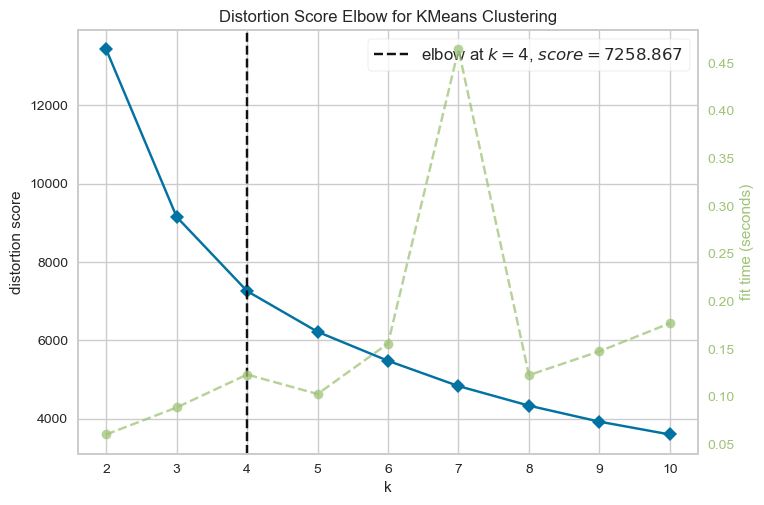

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

**conclusion:**

Result indicates that 4 will be an optimal number of clusters for this data. Now fitting the Clustering Model to get the final clusters.

In [53]:
cluster_k = KMeans(n_clusters=4)
clu_k = cluster_k.fit_predict(PCA_ds)
clu_k

array([1, 2, 1, ..., 1, 3, 2])

In [54]:
db.append(davies_bouldin_score(PCA_ds, cluster_k.labels_))
sil.append(silhouette_score(PCA_ds, cluster_k.labels_))

**DBSCAN**

In [55]:
cluster_db = DBSCAN(eps=0.9, min_samples=10)
clu_A = cluster_db.fit_predict(PCA_ds)
clu_A

array([0, 1, 2, ..., 0, 1, 3], dtype=int64)

In [56]:
db.append(davies_bouldin_score(PCA_ds, cluster_db.labels_))
sil.append(silhouette_score(PCA_ds, cluster_db.labels_))

**Agglomerative**

In [57]:
cluster_agg = AgglomerativeClustering(n_clusters=4)
clu_D = cluster_agg.fit_predict(PCA_ds)
clu_D

array([2, 3, 2, ..., 2, 0, 3], dtype=int64)

In [58]:
db.append(davies_bouldin_score(PCA_ds, cluster_agg.labels_))
sil.append(silhouette_score(PCA_ds, cluster_agg.labels_))

**Evaluation**

In [59]:
res = pd.DataFrame({'Davies Bouldin Index': db, 'Silhouette Index': sil}, index=['KMeans', 'DBSCAN', 'Agglomerative'])
res.index.names = ['Algorithm']
res

Davies Bouldin Index  Silhouette Index
Algorithm                                            
KMeans                     0.940721          0.389115
DBSCAN                     1.840545          0.009294
Agglomerative              1.067713          0.343767

we finalised the k means algorithm it as low Davies Bouldin Index and Silhouette Index is near to 1

In [60]:
PCA_ds['Clusters'] = clu_k
data['Clusters'] = clu_k

# 3-D distribution of the clusters

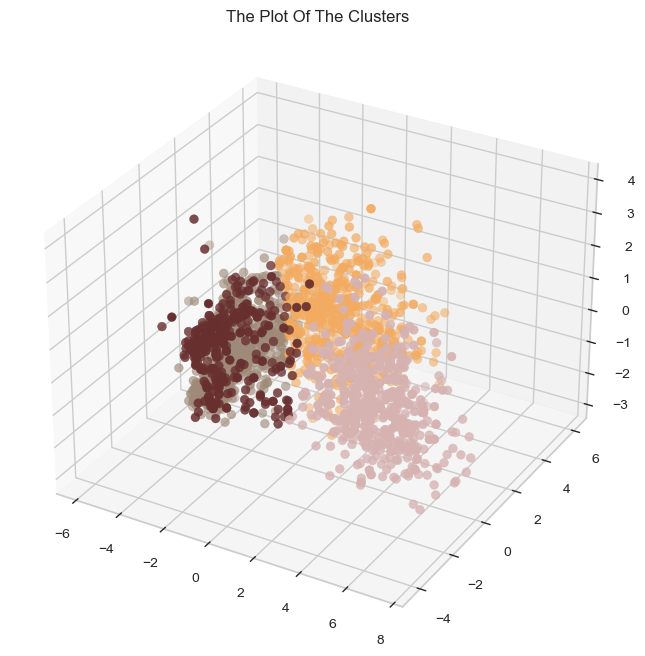

In [61]:
# to examine the clusters formed plotting 3-D distribution of the clusters.
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns. For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

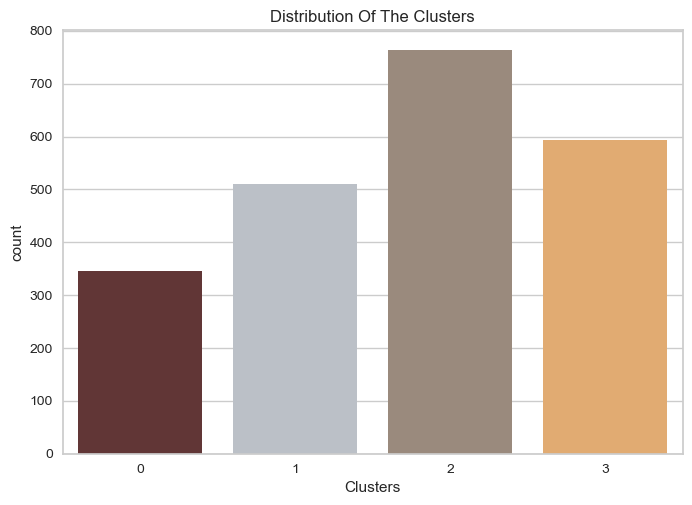

In [62]:
# Plotting group distribution of clustring
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

**The clusters seem to be fairly distributed.**

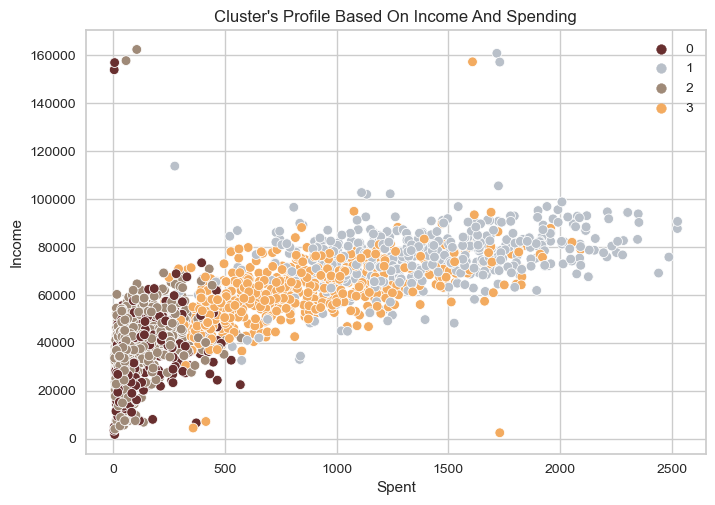

In [63]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Conclusion:
**Income vs spending plot shows the clusters pattern:**

- Cluster 0: high spending & average income
- Cluster 1: high spending & high income
- Cluster 2: low spending & low income
- Cluster 3: high spending & low income


**Now we will be looking at the detailed distribution of clusters as per the various products in the data. Like: Wines, Fruits, Meat, Fish, Sweets and Gold**

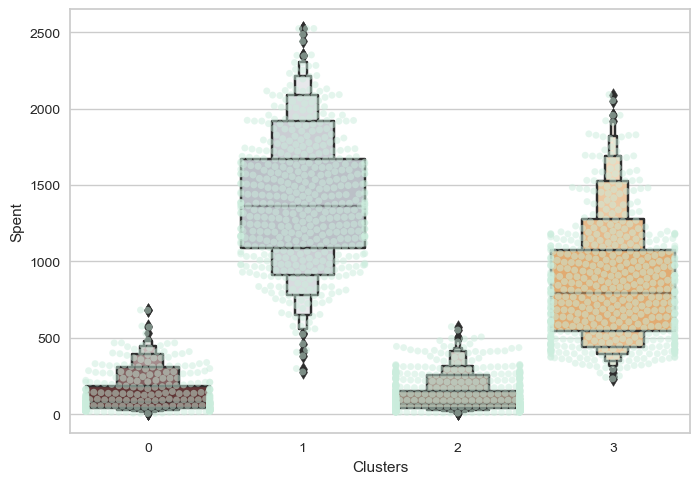

In [64]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

# Conclusion:
From the above plot, it can be clearly seen that **cluster 1** is our biggest set of customers closely followed by **cluster 3**. We can explore what each cluster is spending on for the targeted marketing strategies.

# Let us explore how previous campaigns did in past.

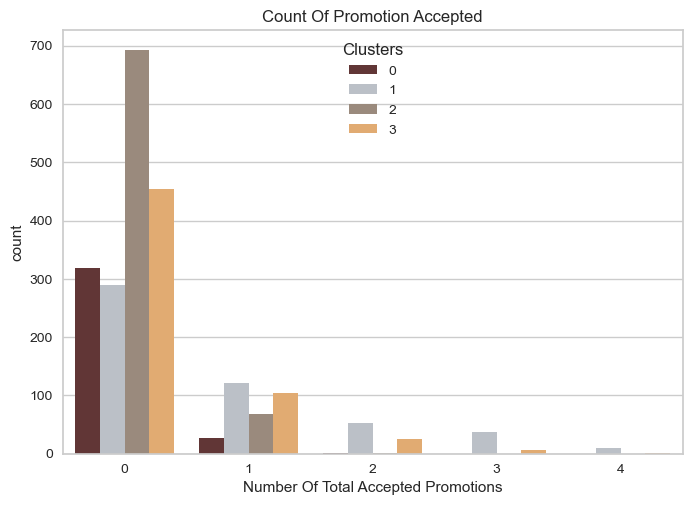

In [65]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ \
                       data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# Conclusion:

There has not been an overwhelming response to the campaigns so far, very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

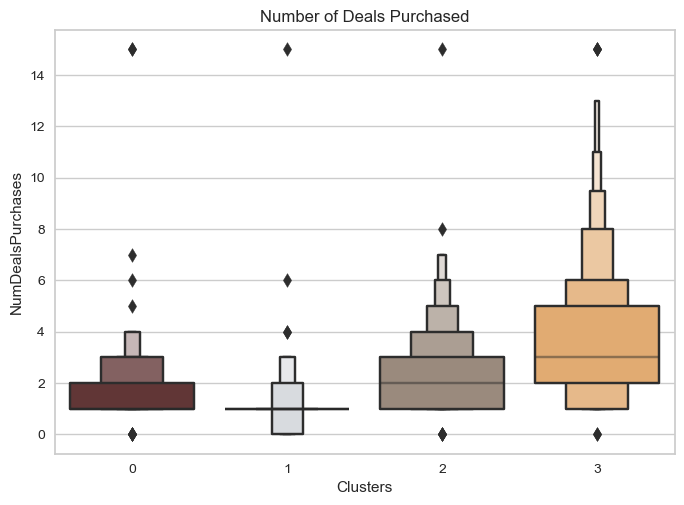

In [66]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

# Conlusion:

- Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly


Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

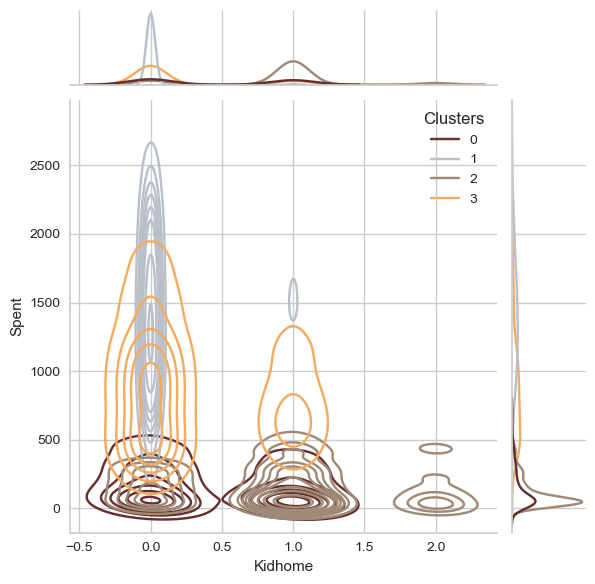

<Figure size 800x550 with 0 Axes>

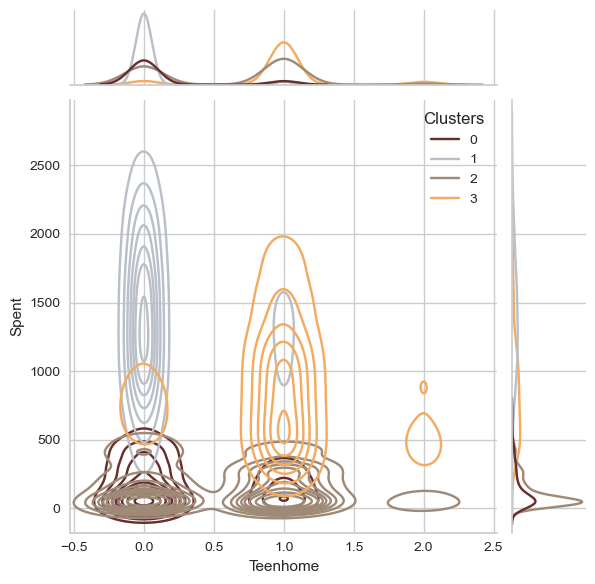

<Figure size 800x550 with 0 Axes>

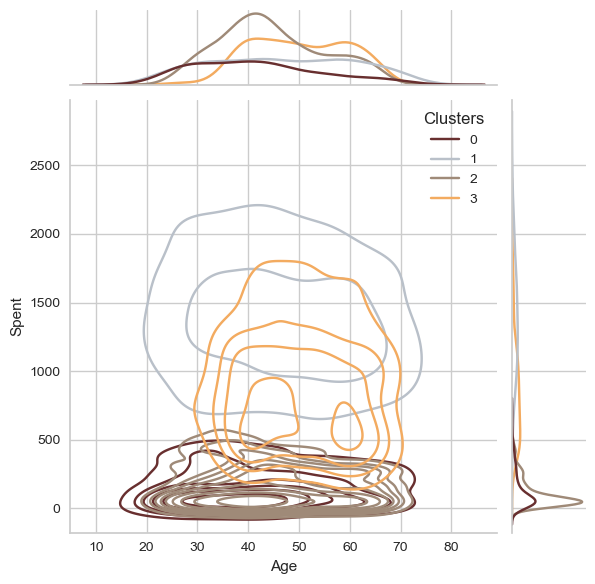

<Figure size 800x550 with 0 Axes>

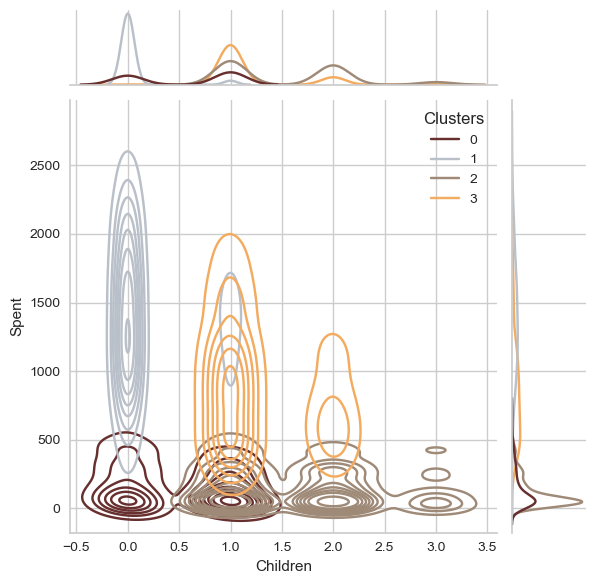

<Figure size 800x550 with 0 Axes>

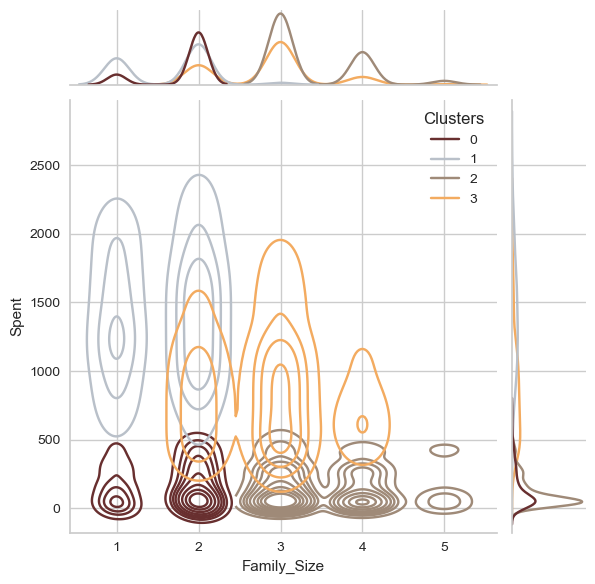

<Figure size 800x550 with 0 Axes>

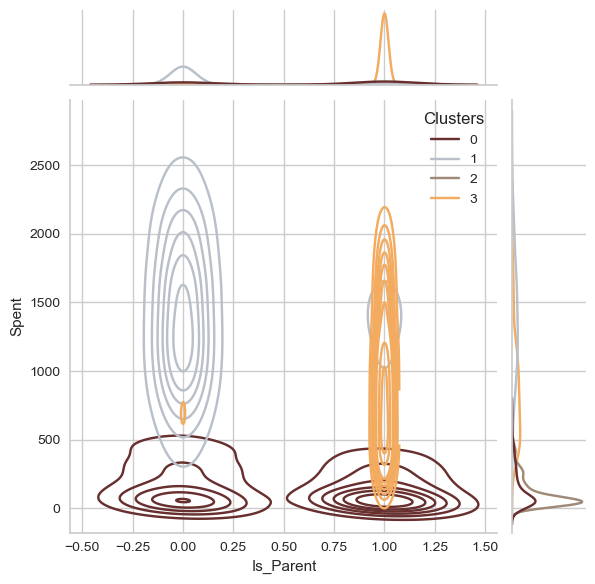

<Figure size 800x550 with 0 Axes>

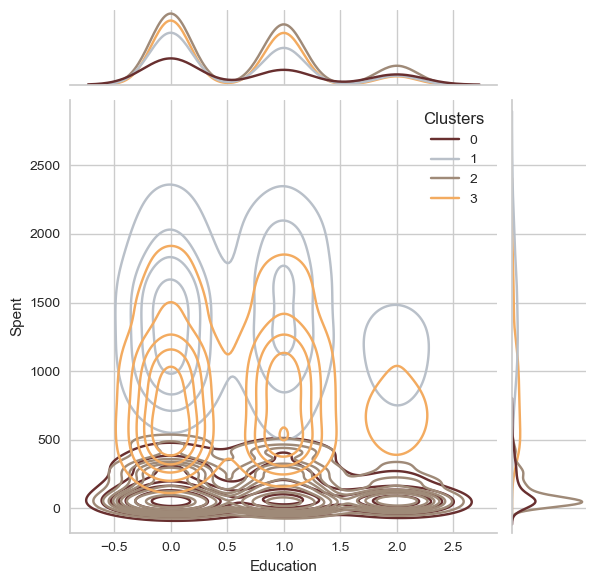

<Figure size 800x550 with 0 Axes>

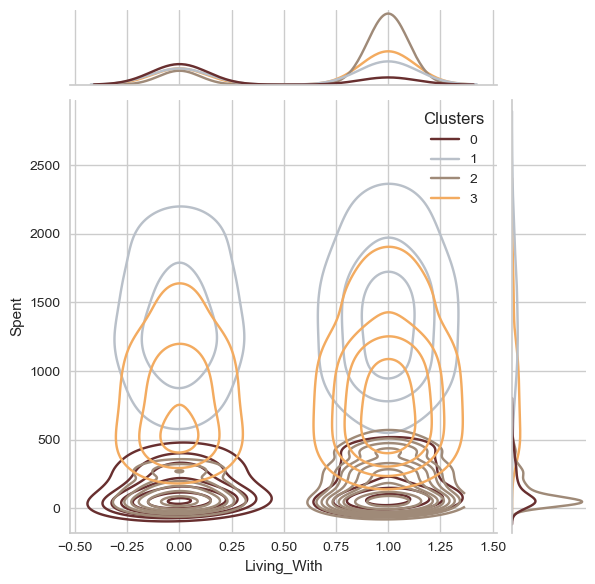

In [67]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

# Final Conclusion:
**About Cluster 0:**
1. Definetly a parent.
2. having atmost 4 members in family and atleast 2 members.
3. Single parent are the subset of this group.
4. Most of them have teenager at home.
5. Relatively older

**About Cluster 1:**
1. Definetly not a parent.
2. Atmost 2 members in the family.
3. Slightly majority of couple over singles
4. Span all the ages.
5. High income group


**About Cluster 2:**
1. Majority of them are parents.
2. Atmost 3 members in family
3. Majority of them having one kid
4. Relatively younger.


**About Cluster 3:**
1. Definetly a parent.
2. Atmost 5 members and atleast 2 members in the family.
3. Majority of them have a teenager at home.
4. Relatively older
5. A lower income group.

In [68]:
scaled_ds['clusters']=clu_k
data.to_csv('scaled_ds.csv', index=False)

In [69]:
PCA_ds

col1      col2      col3  Clusters
0     4.936903 -0.409339  1.156193         1
1    -2.835609  0.211793  0.722085         2
2     2.624988 -0.689776 -0.112533         1
3    -2.620430 -1.344150 -1.132829         2
4    -0.627504  0.286256 -1.249845         2
...        ...       ...       ...       ...
2207  2.314692  2.426727 -0.202148         3
2208 -3.056161  4.259722 -0.685263         2
2209  2.699507 -1.798911  1.379532         1
2210  1.518638  1.847338 -0.196538         3
2211 -2.777623  1.536800 -0.593501         2

[2212 rows x 4 columns]

In [70]:
#train test split 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [71]:
X = PCA_ds.drop('Clusters',axis = 1)
y = PCA_ds.Clusters

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
  

In [73]:
# Define the parameters to test in grid search for each model 
lr_params = {'solver':['liblinear'],'penalty':['l1'], 'C': [1.0, 0.5, 0.25]}
knn_params = {'n_neighbors' : [7,9,11], 'algorithm':['ball_tree','kd_tree','brute'], 'weights': ['uniform', 'distance']}
xgb_params = {'n_estimators':[240,250,260], 'max_depth':[15,16,17], 'colsample_bytree':[0.6,0.7,0.8,1.0]}

In [74]:
# Create grid search objects for each model
lr_grid = GridSearchCV(LogisticRegression(),lr_params,cv=3, scoring = 'recall_macro')
knn_grid = GridSearchCV(KNeighborsClassifier(),knn_params,cv=3, scoring = 'recall_macro')
xgb_grid = GridSearchCV(XGBClassifier(verbosity = 0),xgb_params,cv=3, scoring = 'recall_macro')
nb = GaussianNB()
rf = RandomForestClassifier(criterion = 'gini', max_depth = 3, random_state = 42)

In [75]:
# Fit each grid search to the training set
lr_grid.fit(X_train,y_train)
knn_grid.fit(X_train,y_train)
xgb_grid.fit(X_train,y_train)
nb.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [76]:
# Get the best estimators from the grid search
lr = lr_grid.best_estimator_
knn = knn_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

In [77]:
#Create an ensemble model with all the classifier  
ensemble_model = VotingClassifier(estimators = [
    ('Logidtic_Regression',lr),
    ('KNN',knn),
    ('Naive_Bayes', nb),
    ('Gradient_boost' , best_xgb),
    ('Random_Forest' , rf)
])

In [78]:
# Fit the ensemble model on the training set 
ensem_mod = ensemble_model.fit(X_train,y_train)

In [79]:
#Display the metrics for the validation set 
ensemble_preds = ensem_mod.predict(X_test)
ensemble_val_acc = accuracy_score(y_test,ensemble_preds)
ensemble_val_rec = recall_score(y_test, ensemble_preds,average = 'macro')
print("ensemble_model_accuracy:", ensemble_val_acc)
print("Ensemble Model Recall:",ensemble_val_rec)

ensemble_model_accuracy: 0.983433734939759
Ensemble Model Recall: 0.9832167306729003


In [80]:
import pickle

In [81]:
filename = 'classifier1.pkl' # create a variable with name you wanna give to the file
pickle.dump(ensem_mod, open(filename,'wb')) 